# Lista 8 de Cálculo Numérico

In [243]:
using LinearAlgebra
using Plots

## Questão 1.

### a. Compressão

### Compressão de Dados em Matrizes

A ideia da compressão de dados é encontrarmos vetores base dentro da matriz tal que forneçam uma base para a composição de todos os dados. Porém, na vida real precisamos encontrar aproximações, visto que o uso de números reais acabam dificultando uma base L.I de poucos vetores representarem muitos dados.

Na ideia simples, transformamos a matriz em uma multiplicação de duas matrizes, tal que a primeira seja os vetores base e a segunda os coeficientes das combinações lineares.

Com a preocupação de se adequar aos números reais, começamos a analisar isso pelo erro da matriz original com a nova multiplicação das duas matrizes. Para quantificar o erro, usamos a ideia de norma de matriz, que é dada pela soma das normas de cada vetor (colunas) da matriz.

Então, temos que dado a matriz A e o vetor b, precisamos determinar c tal que 

$$min ||A - [b][c^T]|| \longrightarrow min ||[(a_1)(a_2)...(a_n)] - [c_1(b) c_2(b) ... c_n(b)]|| \longrightarrow ||(a_1 - c_1b)(a_2-c_2b)...(a_n-c_nb)||$$

Visto que $e_n = a_n - c_nb \space \bot \space c_nb$, pelo produto interno temos que $e_n^Tc_nb = 0 \longrightarrow (a_n - c_nb)^Tc_nb = 0$. Aplicando a transposta tal que $(M.Q)^T = Q^T.M^T$ e $(M - Q)^T = M^T - Q^T$ obtemos:

$$(a_n - c_nb)^Tc_nb = 0 \longrightarrow (a_n^T - (c_nb)^T)c_nb = 0 \longrightarrow a_n^Tc_nb - c_n^2b^Tb = 0 \longrightarrow a_n^Tc_nb = c_n^2b^Tb $$

Desconsiderando o caso em que $c_n = 0$ pois é um caso muito trivial, podemos dividir a equação em ambos os lados por $c_n$, resultando em:

$$a_n^Tb = c_nb^Tb \longrightarrow c_n = \frac{a_n^Tb}{b^Tb}$$

A partir da análise feita acima podemos escrever um código em Julia para achar o vetor c:

In [244]:
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m, n = size(A)
    A = 1.0 * A # multiplica-se por 1.0 para evitar erros de operações matriciais entre inteiros e float's.
    c = zeros(n)    
    c = A'*(b/(b'*b)) # Operação para achar o vetor c que minimiza a distância perpendicular à reta.
    return c
end

melhores_coords (generic function with 1 method)

In [245]:
A=[1.0001 10.001 3;2.01 20.3 6;3.003 30 9]

3×3 Array{Float64,2}:
 1.0001  10.001  3.0
 2.01    20.3    6.0
 3.003   30.0    9.0

In [246]:
b=[1;2;3]

3-element Array{Int64,1}:
 1
 2
 3

In [247]:
c=melhores_coords(A,b)

3-element Array{Float64,1}:
  1.0020785714285714
 10.04292857142857
  3.0

In [248]:
norm(A-b*c') # O erro ainda é bem grande

0.2534747564213406

Podemos aplicar o método de melhores coordenadas mais vezes, até convergir e encontrarmos a melhor coordenada possível para a base dada. Para aplicar mais de uma vez, alteramos entre bases que são equivalentes como o algoritmo abaixo denota:

In [249]:
function acha_melhor_minimizacao(A)
    # Pega o tamanho da matriz A
    n,m = size(A)
    
    # Inicializa os vetores que serão usados: b para as bases e para os coeficientes.
    bv = randn(n)
    cv = randn(m)
    
    bw = zeros(m)
    cw = zeros(n)
    
    # Aplicamos o método de melhores_coords 100 vezes para maior garantia que o método convergiu
    for i in 1:50
        cv=melhores_coords(A, bv) 
        bw=cv
        cw=melhores_coords(A', bw)
        bv=cw
    end
    
    return bv,cv
end

acha_melhor_minimizacao (generic function with 1 method)

Como o método mais acima é usado somente com uma base e queremos usar um número qualquer, precisamos generalizar. Chamamos a generalização de método da compressão:

In [250]:
function compressao(A,nível)
    # Pega tamanho e inicializa os vetores
    m,n=size(A)
    B=zeros(m,nível)
    C=zeros(n,nível)
    
    for i=1:nível
        B[:,i], C[:,i] = acha_melhor_minimizacao(A) # aplica melhor minimizacao para cada base e coeficiente
        A = A - B[:,i]*C[:,i]' # Vai reduzindo o erro
    end
    return B,C
end

compressao (generic function with 1 method)

In [251]:
A = randn(3,4)

3×4 Array{Float64,2}:
  2.36425    0.918871  -0.764153  -2.08212
 -0.511204  -1.7871    -1.50781   -0.631609
  0.187884   0.425158   0.983586  -0.209389

In [252]:
B,C = compressao(A,3)

([-1.813319628444808 0.23119806481861876 0.08014695743508177; 0.18627773229753664 1.774985708500137 -0.8986964897893819; -0.13256554274559934 -0.6683160227493781 -2.359128841037154], [-1.3193836560391228 -0.13321813217061 0.03223775480243875; -0.6153348051660495 -0.8885437904892883 0.10607387106105673; 0.2916991808189086 -0.9615661031042078 -0.16091734890446352; 1.1033575135737663 -0.4006223698660768 0.1402486216186313])

In [253]:
norm(A-B*C')

3.387999773988765e-16

In [254]:
# Chance pequena de existirem colunas Linearmente Dependentes
N = 20
A = randn(N, N)
for i in 1:N
    B,C = compressao(A, i)
    print(i, ": ", norm(A-B*C'), "\n")
end

1: 18.56562762673462
2: 16.80517787086695
3: 15.182149914255637
4: 13.666536452384204
5: 12.176748226636187
6: 10.735360880285674
7: 9.630533886275304
8: 8.538848333825037
9: 7.411864169338849
10: 6.498741397442475
11: 5.639794154100951
12: 4.834557879288218
13: 4.055416711403662
14: 3.2545422898955056
15: 2.574505462786986
16: 2.0052135216102194
17: 1.3482578050968284
18: 0.5713853921096133
19: 0.021357152686520005
20: 5.093497972679533e-15


In [255]:
N = 20
A = zeros(N, N)
for i in 1:N
    A[:, i] .= i
end
for i in 1:10
    B,C = compressao(A, i)
    print(norm(A-B*C'), "\n")
end

1.831026719408895e-14
0.0
0.0
NaN
NaN
NaN
NaN
NaN
NaN
NaN


### b. Gauss-Jacobi

O método utilizado será o do ponto fixo, em que iniciamos com o sistema linear:

$$A.x=b$$

Chamaremos $A=M-K$ para um $M$ facilmente invertível e um $K$ resto da matriz.

$$M.x-K.x=b \\
M.x=b+K.x \\
x=M^{-1}.b+M^{-1}.K.x$$

Chamaremos $M^{-1}.b$ de $c$ e o $M^{-1}.K$ de $R$:

$$x=R.x+c$$

Nosso método numérico a ser implementado em cima dessa equação é dar um chute inicial e ir substituindo nela:

$$x^{(0)}=chute_{inicial}$$

$$x^{(k+1)}=R.x^{(k)}+c$$

No caso específico do **Gauss-Jacobi**, a **matriz $M$ facilmente inversível é uma diagonal.**

In [256]:
function gauss_jacobi(A,b,iteracoes)
    M = Diagonal(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_jacobi (generic function with 1 method)

In [257]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 8.881784197001252e-16


In [258]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 1.1102230246251565e-16


### c. Gauss-Seidel

O método de Gauss-Seidel é semelhante ao anterior, a diferença está no M, que ao invés de utilizar a matriz diagonal que é fácil de inverter, utiliza a triangular superior, que também possui uma inversão fácil.

In [259]:
function gauss_seidel(A,b,iteracoes)
    M = UpperTriangular(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_seidel (generic function with 1 method)

In [260]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 8.881784197001252e-16


In [261]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 2.220446049250313e-16


## Questão 2.

Faça o gráfico do sistema linear

$$
\begin{equation}
    \begin{cases}
      2x_1 + x_2 = 2\\
      -x_1 + 2x_2 = 2
    \end{cases}
\end{equation}
$$

e resolva-os pelo método de Gauss-Jacobi e Gauss-Seidel com n passos
tal que a **tolerância**=$||x^{(n)} − x^{(n-1)}||$ seja menor que $10^{-3}$. Marque as iterações no gráfico.


Temos o sistema de equações:

$$
\begin{equation}
    \begin{cases}
      2x_1 + x_2 = 2\\
      -x_1 + 2x_2 = 2
    \end{cases}
\end{equation}
$$

que pode ser simplificado deixando x_1 em evidência:

$$
\begin{equation}
    \begin{cases}
      x_1 = 1 - \frac{x_2}{2}\\
      x_1 = 2x_2 - 2
    \end{cases}
\end{equation}
$$

E então, mudando apenas os nomes das variáveis para ficar mais explícito $(x_1 = y$ e $x_2 = x)$:

$$
\begin{equation}
    \begin{cases}
      y = 1 - \frac{x}{2}\\
      y = 2x - 2
    \end{cases}
\end{equation}
$$

Temos duas retas e queremos encontrar para qual valor de x e y elas se interceptam. Fazendo o gráfico do sistema podemos observar melhor:

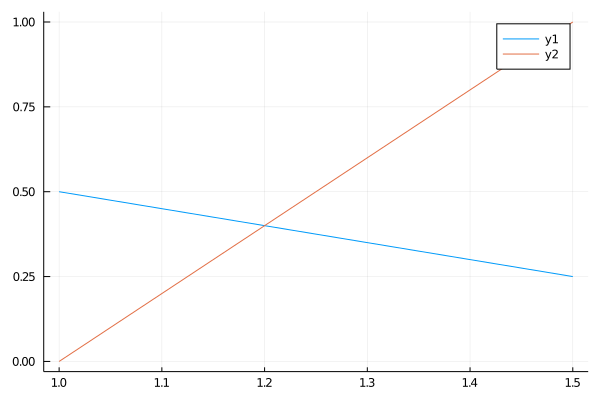

In [262]:
f(x) = 1 - x/2 # primeira equação
g(x) = 2x - 2 # segunda equação

P = plot([f,g], 1, 1.5) # intervalo arbitrário que contenha o ponto de interseção

Para resolver o sistema pelos métodos de Gauss-Jacobi e Gauss-Seidel precisamos montar a equação com matrizes $Ax=b$. Logo, a partir do sistema linear

$$
\begin{equation}
    \begin{cases}
      2x_1 + x_2 = 2\\
      -x_1 + 2x_2 = 2
    \end{cases}
\end{equation}
$$

Temos:

$$
\begin{bmatrix} 
    2 & 1 \\
    -1 & 2 \\
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
\end{bmatrix}
=
\begin{bmatrix} 
    2 \\
    2 \\
\end{bmatrix}
$$

Ou seja,

$$A = \begin{bmatrix} 
    2 & 1 \\
    -1 & 2 \\
\end{bmatrix}
\space e \space b = \begin{bmatrix} 
    2 \\
    2 \\
\end{bmatrix}$$

Agora podemos aplicar os dois métodos, pois já temos a Matriz A e o vetor B, a fim de encontrar uma aproximação do vetor x:

In [263]:
""" Aplicando o método de Gauss-Jacobi primeiro"""
A = [2 1; -1 2]
b = [2; 2]

# Para printar as iterações no gráfico
array_x = []
array_y = []

iterador = 1 # número de passos até ecnontrar erro menor que 10^(-3)
x_anterior = randn(2) # chute inicial qualquer do vetor x_0
x_atual = randn(2)  # chute inicial qualquer do vetor x_1
while (norm(x_atual - x_anterior) >= 1e-3) # enquanto || x^(n) - x^(n-1) || menor que 10^(-3)
    x_anterior = x_atual # atualiza x^(n-1)
    x_atual = gauss_jacobi(A, b, iterador) # atualiza x^n
    push!(array_x, x_atual[2]) # array_x armazena o valor de x
    push!(array_y, x_atual[1]) # array_y armazena o valor de y
    print(x_atual, "\n") # printa x^n
    iterador += 1 # número de passos aumenta em 1
end
print("\n", "Iterações: ", iterador, "\n") # número de passos total
print("Tolerância do Sistema: ", norm(A*x_atual - b), "\n") # tolerância de acordo com o sistema
print("Tolerância do passo: ", norm(x_atual - x_anterior)) # tolerância de acordo com o passo seguinte e o passo anterior

[1.0; 1.0]
[0.5; 1.5]
[0.25; 1.25]
[0.375; 1.125]
[0.4375; 1.1875]
[0.40625; 1.21875]
[0.390625; 1.203125]
[0.3984375; 1.1953125]
[0.40234375; 1.19921875]
[0.400390625; 1.201171875]
[0.3994140625; 1.2001953125]
[0.39990234375; 1.19970703125]

Iterações: 13
Tolerância do Sistema: 0.0006905339660024879
Tolerância do passo: 0.0006905339660024879

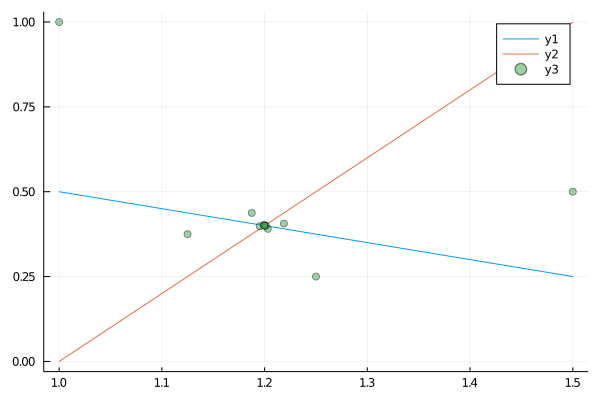

In [264]:
scatter!(P, array_x, array_y, alpha=0.5) # Faz o Plot com os pontos das iterações

In [265]:
""" Aplicando o método de Gauss-Seidel """

A = [2 1; -1 2]
b = [2; 2]

# Para printar as iterações no gráfico
array_x = []
array_y = []

iterador = 1 # número de passos até ecnontrar erro menor que 10^(-3)
x_anterior = randn(2) # chute inicial qualquer do vetor x_0
x_atual = randn(2)  # chute inicial qualquer do vetor x_1

while (norm(x_atual - x_anterior) >= 1e-3) # enquanto || x^(n) - x^(n-1) || menor que 10^(-3)
    x_anterior = x_atual # atualiza x^(n-1)
    x_atual = gauss_seidel(A, b, iterador) # atualiza x^n
    push!(array_x, x_atual[2]) # array_x armazena o valor de x
    push!(array_y, x_atual[1]) # array_y armazena o valor de y
    print(x_atual, "\n") # printa x^n
    iterador += 1 # número de passos aumenta em 1
end

print("\nIterações: ", iterador, "\n") # número de passos total
print("Tolerância do Sistema: ", norm(A*x_atual - b), "\n") # tolerância de acordo com o sistema
print("Tolerância do passo: ", norm(x_atual - x_anterior)) # tolerância de acordo com o passo seguinte e o passo anterior

[0.5; 1.0]
[0.375; 1.25]
[0.40625; 1.1875]
[0.3984375; 1.203125]
[0.400390625; 1.19921875]
[0.39990234375; 1.2001953125]
[0.4000244140625; 1.199951171875]

Iterações: 8
Tolerância do Sistema: 0.0001220703125
Tolerância do passo: 0.0002729575167846423

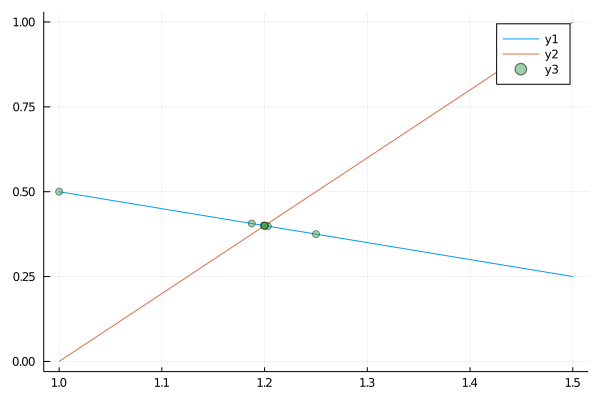

In [266]:
f(x) = 1-x/2
g(x) = 2x - 2

G = plot([f,g], 1, 1.5)

scatter!(G, array_x, array_y, alpha=0.5) # Faz o Plot com os pontos das iterações

## Questão 3.

**(A)** (**TODO:** Talvez melhorar a explicação) Podemos modelar o problema levando em consideração as quatro direções e suas respectivas temperaturas, montando o seguinte sistema

\begin{align*}
x_1 &= \frac{1}{4} (5 + 15 + x_2 + x_3) &\implies 4x_1 - x_2 - x_3 &= 20\\
x_2 &= \frac{1}{4} (x_1 + 15 + 35 + x_4) &\implies 4x_2 - x_1 - x_4 &= 50\\
x_3 &= \frac{1}{4} (5 + x_1 + x_4 + 10) &\implies 4x_3 - x_1 - x_4 &= 15\\
x_4 &= \frac{1}{4} (x_3 + x_2 + 35 + 10) &\implies 4x_4 - x_2 - x_3 &= 45
\end{align*}

**(B)** Vendo linha a linha temos:

\begin{align*}
|A_{11}| = 4 \geq \sum_{i\ne j} |A_{ij}| = 2\\
|A_{22}| = 4 \geq \sum_{i\ne j} |A_{ij}| = 2\\
|A_{33}| = 4 \geq \sum_{i\ne j} |A_{ij}| = 2\\
|A_{44}| = 4 \geq \sum_{i\ne j} |A_{ij}| = 2\\
\end{align*}

Como a desigualdade é satisfeita para todas as linhas, temos que ela é
diagonal dominante, consequentemente, temos que ambos os métodos de Gauss-Jacobi
e Gauss-Seidel convergem.

**(C)** Montando o sistema em Julia temos, podemos aproximar a temperatura nos quatro vértices

In [267]:
A = [4 -1 -1 0; -1 4 0 -1; -1 0 4 -1; 0 -1 -1 4] * 1.0
b = [20; 50;  15; 45] * 1.0

function gauss_seidel(A, b, EPS)
    U = UpperTriangular(A)
    L = U - A
    
    Uinv = inv(U)
    
    T = Uinv * L
    C = Uinv * b

    basis = ones(length(b))

    error = 1.0

    iter = 1

    while true
        basis = T * basis + C
        error = norm(T * basis + C - basis)
        if (error < EPS)
            break
        end
        iter += 1
    end

    return basis
end

function jacobi(A, b, EPS) 
    D = Diagonal(A)
    K = D - A
    iD = inv(D)

    T = iD * K
    C = iD * b

    basis = ones(size(A)[1], 1)
    iter = 1
    error = 1.0

    while true
        error = norm(T * basis + C - basis)
        basis = T * basis + C
        if error < 10^(-3)
            break
        end

        iter += 1
    end
    
    return basis
end

display(jacobi(A, b, 10^(-3)))
display(gauss_seidel(A, b, 10^(-3)))

4×1 Array{Float64,2}:
 13.124534606933594
 20.624534606933594
 11.874534606933594
 19.374534606933594

4-element Array{Float64,1}:
 13.124849319458008
 20.624698638916016
 11.874698638916016
 19.37439727783203

**(D)** Para este item vamos generalizar o método acima para que seja viável construir
sistemas maiores de mesmo formato (temperatura somente nos quatro lados do grid), podemos alterar o tamanho do grid e 

In [268]:
# dimensão do grid (Testado com matrizes quadradas)
function constroi_sistema(dim) 
    # quantidade de variaveis no sistema
    num_var = dim * dim

    A = zeros((num_var, num_var))
    b = zeros(num_var)

    # arrays direção para facilitar na iteração -> [esq, cima, direita, baixo]
    dx = [-1 0 1 0]
    dy = [0 1 0 -1]

    # temperatura em cada lado do grid -> [esq, cima, dir, baixo]
    temperature = [25 20 20 30]

    for i in 1 : dim
        # temperatura de cima
        b[i] += temperature[2]

        # temperatura da dir
        b[i * dim] += temperature[3]

        # temperatura da esq
        b[(i - 1) * dim + 1] += temperature[1]

        # temperatura de baixo
        b[(dim - 1) * dim + i] += temperature[4]
    end

    # checa se o vértice está dentro do grid
    function check(i, j, id)
        return (i >= 1 && j >= 1 && i <= dim && j <= dim && id >= 1 && id <= num_var)
    end

    # constroi a nossa matriz do sistema levando em consideração
    # as direções possíveis
    for i in 1 : dim
        for j in 1 : dim
            new_var = (i - 1) * dim + j
            A[new_var, new_var] = num_var

            for k in 1 : 4
                new_i = i + dx[k]
                new_j = j + dy[k]

                loc = (new_i - 1) * dim + new_j

                if check(new_i, new_j, loc)
                    A[new_var, loc] = -1
                end
            end
        end
    end
    
    return A, b
end

A, b = constroi_sistema(5)

temperatura_estimada_gs = gauss_seidel(A, b, 10^(-3))
temperatura_estimada_jacobi = display(jacobi(A, b, 10^(-3)))

25×1 Array{Float64,2}:
 1.8814487552
 0.9136544768
 0.8744296448000001
 0.9049166848000001
 1.6724022272
 1.1223789568
 0.08519946240000001
 0.0417562624
 0.0757750784
 0.9049310208000001
 1.0925677568
 0.0516097024
 0.0078792704
 0.042146918400000004
 0.8747952128
 1.1398545408
 0.1040482304
 0.0606818304
 0.0946238464
 0.9224066048
 2.2995418112
 1.3485503488
 1.3099747328
 1.3398125567999999
 2.0904952832

Temos então que a temperatura nos vértices do interior do grid são aproximadamente

In [269]:
display(temperatura_estimada_gs)

25-element Array{Float64,1}:
 1.8814400535262978
 0.9136378565452907
 0.8743911277977362
 0.9048503160706224
 1.6724112917214005
 1.122363481612154
 0.08513731962737954
 0.04156518274377449
 0.07579847651858843
 0.9050429008052224
 1.092531754469316
 0.05141865276188393
 0.007892951215112194
 0.0424006110806016
 0.87510445146112
 1.1397887499211952
 0.10404115395090843
 0.060904545032601606
 0.09505903083520001
 0.92283932672
 2.2995353875329845
 1.3486157621428223
 1.31022976090112
 1.34019919872
 2.090856448

**(E)**

In [270]:
A, b = constroi_sistema(104)

@time display(jacobi(A, b, 10^(-3)))

10816×1 Array{Float64,2}:
 0.004160887741383967
 0.0018496681752099963
 0.0018494544733719243
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 0.0018494544544043758
 ⋮
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816677760594
 0.0027741816827920353
 0.002774352632565838
 0.004623208599957113

 15.633514 seconds (1.38 k allocations: 1.745 GiB, 37.26% gc time)


In [271]:
A, b = constroi_sistema(60)

@time display(gauss_seidel(A, b, 10^(-3)))

3600-element Array{Float64,1}:
 0.012503475117408616
 0.005560573882602405
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 0.005558721001515141
 ⋮
 0.008338274392647484
 0.008338274392647484
 0.008338274392647484
 0.008338274392647484
 0.008338274392647484
 0.008338274392647484
 0.008338274392647484
 0.008338274392647517
 0.00833827439276664
 0.008338274821495687
 0.008339817817048657
 0.013893057784636488

  3.105709 seconds (1.36 k allocations: 297.051 MiB)


**(E)** **TODO!**

## Questão 4.

(a) Faça a modelagem sem o cano pontilhado x9 e resolva o sistema linear com o método de Gauss-Jacobi e Gauss-Seidel com tolerância de $10^{-3}$. Os métodos convergem?

### Resposta:

Modelando o problema da distribuição de água temos as equações:

$$x_8 = x_6 + x_7 + 500$$
$$x_7 = x_5 + 3000$$
$$x_6 = x_4 + x_2$$
$$x_5 = x_3 + 3000$$
$$x_4 = x_1 + 30000$$
$$x_3 = 9000$$
$$x_2 = 3500$$
$$x_1 = 7000$$

E portanto podemos montar o sistema linear

$$
\begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 \\
    0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 \\
    0 & -1 & 0 & -1 & 0 & 1 & 0 & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 \\
    -1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7 \\
    x_8 \\
\end{bmatrix}
=
\begin{bmatrix} 
    500 \\
    3000 \\
    0 \\
    3000 \\
    30000 \\
    9000 \\
    3500 \\
    7000 \\
\end{bmatrix}
$$

Obtemos uma matriz A com a diagonal toda zerada e os métodos de Gauss-Seidel e Gauss-Jacobi não funcionarão. No entanto, podemos fazer operações em cima da nossa matriz a fim de torná-la funcional para nossos métodos:

In [272]:
# Define a matriz A e o vetor B
A = [0 0 0 0 0 -1 -1 1; 0 0 0 0 -1 0 1 0; 0 -1 0 -1 0 1 0 0; 0 0 -1 0 1 0 0 0; -1 0 0 1 0 0 0 0; 0 0 1 0 0 0 0 0; 0 1 0 0 0 0 0 0; 1 0 0 0 0 0 0 0]
b = [500; 3000; 0; 3000; 30000; 9000; 3500; 7000]

# Tamanho da Matriz Quadrada
N = 8
R = zeros(N,N)
bzinho = zeros(N)
for i in 1:N
    R[i, :] .= A[(N+1)-i, :]
    bzinho[i] = b[(N+1)-i]
end

R

8×8 Array{Float64,2}:
  1.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0
  0.0   1.0   0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   1.0   0.0   0.0   0.0   0.0  0.0
 -1.0   0.0   0.0   1.0   0.0   0.0   0.0  0.0
  0.0   0.0  -1.0   0.0   1.0   0.0   0.0  0.0
  0.0  -1.0   0.0  -1.0   0.0   1.0   0.0  0.0
  0.0   0.0   0.0   0.0  -1.0   0.0   1.0  0.0
  0.0   0.0   0.0   0.0   0.0  -1.0  -1.0  1.0

In [273]:
bzinho

8-element Array{Float64,1}:
  7000.0
  3500.0
  9000.0
 30000.0
  3000.0
     0.0
  3000.0
   500.0

Aplicando então os dois métodos:

In [274]:
for i in 1:5
    x = gauss_jacobi(NewA,NewB, i)
    print(norm(NewA*x - NewB), "\n") # erro entre as iterações
end
print("\n", x)

LoadError: [91mUndefVarError: NewA not defined[39m

In [275]:
for i in 1:5
    x = gauss_seidel(NewA,NewB, i)
    print(norm(NewA*x - NewB), "\n") # erro entre as iterações
end
print("\n", x)

LoadError: [91mUndefVarError: NewA not defined[39m

Os dois métodos convergem e encontram o mesmo vetor x como solução

In [276]:
norm(R*x - bzinho) # erro no sistema alterado

LoadError: [91mDimensionMismatch("A has dimensions (8,8) but B has dimensions (4,1)")[39m

In [277]:
norm(A*x - b) # erro no sistema original

LoadError: [91mDimensionMismatch("matrix A has dimensions (8,8), matrix B has dimensions (4,1)")[39m

(b) (Desafio) Faça a modelagem com o cano pontilhado x9 e tente resolver o sistema linear com Julia e com o método de Gauss-Jacobi e Gauss-Seidel com tolerância de $10^{-3}$. O que aconteceu?

### Resposta:

A modelagem com o cano pontilhado $x_9$ possui esta variável a mais porém nenhuma equação adicional:

$$
\begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 & 0 \\
    0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 & 0 \\
    0 & -1 & 0 & -1 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 & 1 \\
    -1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & -1 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7 \\
    x_8 \\
    x_9\\
\end{bmatrix}
=
\begin{bmatrix} 
    500 \\
    3000 \\
    0 \\
    3000 \\
    30000 \\
    9000 \\
    3500 \\
    7000 \\
\end{bmatrix}
$$

In [278]:
rank(NewA) # Vemos que o número de colunas L.I ainda é 8

LoadError: [91mUndefVarError: NewA not defined[39m

Como o número de variáveis é 9 e o número de equações é apenas 8 sabemos que não é possível encontrar uma solução para o sistema proposto. Estamos no caso de infinitas soluções e portanto os métodos não convergem.

## Questão 5.

A.

In [279]:
A = [0 1 3; 3 1 0] * 1.0

b, c = acha_melhor_minimizacao(A)

println("Erro: ", norm(A - b * c'))

display(b * c')

2×3 Array{Float64,2}:
 1.50001  0.999968  1.49989
 1.50011  1.00003   1.49999

Erro: 3.000000000415844


Podemos plotar a solução, mostrando como os vetores originais são compactados na mesma reta, dada pelo vetor da base b.

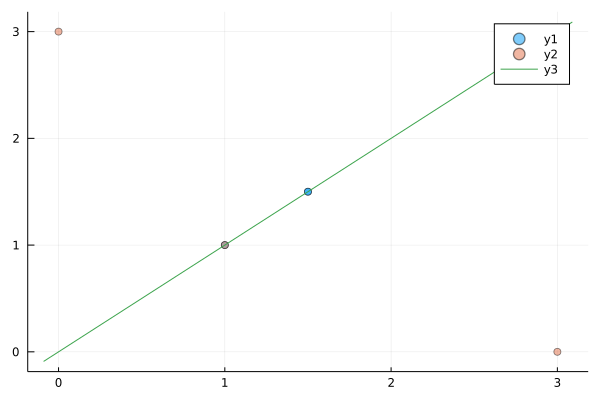

In [280]:
m = b*c'
p = scatter(m[1,:], m[2,:], alpha=0.5)
scatter!(p, A[1,:], A[2,:], alpha=0.5)

f(x) = b[2]*x/b[1]
plot!(p, f)

B. 

In [281]:
A = [0 1 3 2; 2 3 1 0] * 1.0

b, c = acha_melhor_minimizacao(A)

println("Erro: ", norm(A - b * c'))

display(b * c')

2×4 Array{Float64,2}:
 1.0  2.0  2.0  1.0
 1.0  2.0  2.0  1.0

Erro: 2.8284271247461903


Podemos plotar a solução, mostrando como os vetores originais são compactados na mesma reta, dada pelo vetor da base b.

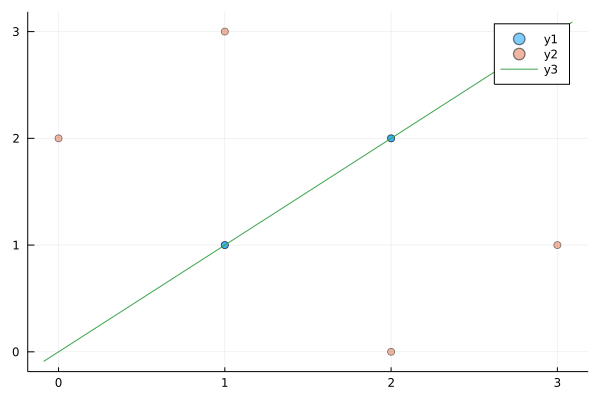

In [282]:
m = b*c'
p = scatter(m[1,:], m[2,:], alpha=0.5)
scatter!(p, A[1,:], A[2,:], alpha=0.5)

f(x) = b[2]*x/b[1]

plot!(p, f)

## Questão 6.

### Considere a bandeira da Grécia como uma imagem preta e branca e modele com uma matriz A.

Para modelarmos a bandeira da grécia como uma matriz, consideraremos a seguinte imagem, que preparei com muito carinho:

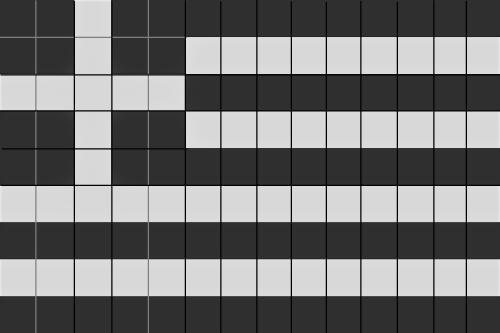

Logo teremos 

$$A = 
\begin{bmatrix} 
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}
$$

#### (a) Qual é o posto da bandeira da Grécia (tal que $A = BC^t$)? O que a matriz $B$ e matriz $C^t$ representam nesse caso? Explique com as suas próprias palavras.

$A = 
\begin{bmatrix} 
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix} 
=
\begin{bmatrix}
    1 & 0 & 1 \\
    1 & 0 & 0 \\
    0 & 0 & 1 \\
    1 & 0 & 0 \\
    1 & 0 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}
$

A matriz $B$ representaria as diferentes "colunas" que a bandeira tem, que, nesse caso, são $3$, o nosso posto. $C^t$ por consequência representaria a ordem das "colunas" na bandeira.

#### (b) Determine dois países tais quais sua bandeira tem posto = 1?

Para posto = 1, podemos pensar em bandeiras horizontais, como Ucrânia, Rússia, Iémen, Indonésia, ...

#### (c) Determine dois países tais quais sua bandeira tem posto = 2?

Para posto = 2, podemos pensar em bandeiras horizontais, porém com algum detalhe simples vertical, como Dinamarca, Finlândia, Suécia, ...

#### (c) Determine dois países tais quais sua bandeira tem posto = 3?

Para posto = 3, podemos pensar em bandeiras verticais com três cores, como Bélgica, França, Chade, Guinea, ...

##### Super interessante pensar nos postos para bandeiras complicadas como a do Brasil, Japão, Arábia Saudita, ...

## Questão 7.

Primeiro, fazemos a inserção da imagem:

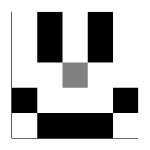

In [283]:
imagem = [0 1 0 1 0 ; 0 1 0 1 0 ; 0 0 0.5 0 0 ; 1 0 0 0 1 ; 0 1 1 1 0]
plot(Gray.(1 .- imagem), size=(150,150), axis=nothing)

Podemos descobrir o posto da imagem através da função rank:

In [284]:
rank(imagem)

3

Para níveis de compressão abaixo do posto da imagem, a nitidez é prejudicada:

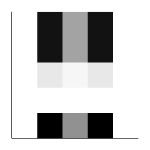

In [285]:
B,c = compressao(imagem, 1)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

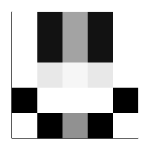

In [286]:
B,c = compressao(imagem, 2)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

A partir do nível de compressão igual ao posto da imagem a nitidez é mantida como a original.

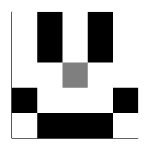

In [287]:
B,c = compressao(imagem, 3)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

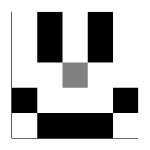

In [288]:
B,c = compressao(imagem, 4)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

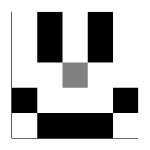

In [299]:
B,c = compressao(imagem, 5)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

## Questão 8.

In [290]:
using LinearAlgebra
using Images
using JLD

### Encontre (ou desenhe) uma imagem A, com mais ou menos $200 × 200$ pixels (pode ser um pouco maior), que

#### (a) exija um nível de compressão maior que 3 e menor que 6 para recuperar pelo menos 99% de sua norma total.

Escolhemos o logo da Xiaomi levemente modificado para que fique sem curvas, o que justifica o posto 4~5.

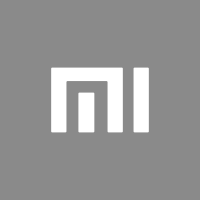

In [291]:
img = load("xiaomi.png");
display(Gray.(img))
raw = channelview(Gray.(img[:,:]));

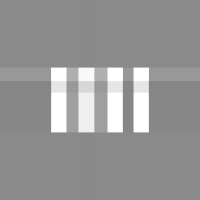

In [292]:
B,C=compressao(raw,2)
display(Gray.(B*C'))

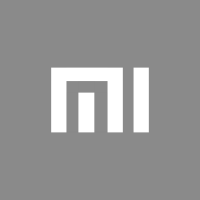

In [293]:
B,C=compressao(raw,4)
display(Gray.(B*C'))

#### (b) exija um nível de compressão maior que 40 para recuperar pelo menos 99% de sua norma total.

Escolhemos um qr code bem complicado para que necessite bastantes postos para restaurar a imagem.

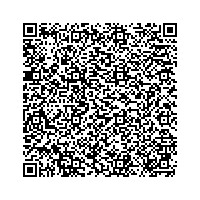

In [294]:
img = load("qrCode.png");
display(Gray.(img))
raw = channelview(Gray.(img[:,:]));

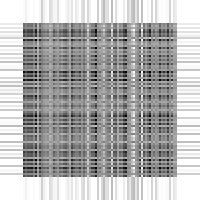

In [295]:
B,C=compressao(raw,2)
display(Gray.(B*C'))

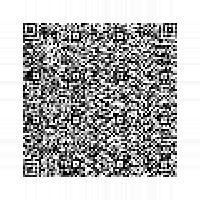

In [296]:
B,C=compressao(raw,20)
display(Gray.(B*C'))

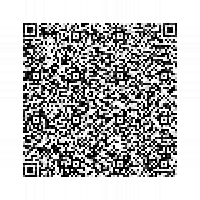

In [297]:
B,C=compressao(raw,41)
display(Gray.(B*C'))

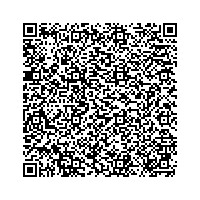

In [298]:
B,C=compressao(raw,100)
display(Gray.(B*C'))